In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature

In [3]:
ncf = nc.NCFile('/data/detectors/2016-06-13_185839_Tc.nc')

In [4]:
sweep = ncf.sweep
temperature.add_temperature(sweep, 'hpd')

retrying...


In [9]:
Ts = np.array([sa.state.temperature.primary_package for sa in sweep.stream_arrays])
epochs = np.array([sa.epoch for sa in sweep.stream_arrays])

In [10]:
T_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=Ts.min(), vmax=Ts.max()), cmap=mpl.cm.hot)
epoch_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=epochs.min(),
                                                                 vmax=epochs.max()),
                                                                 cmap=mpl.cm.coolwarm)

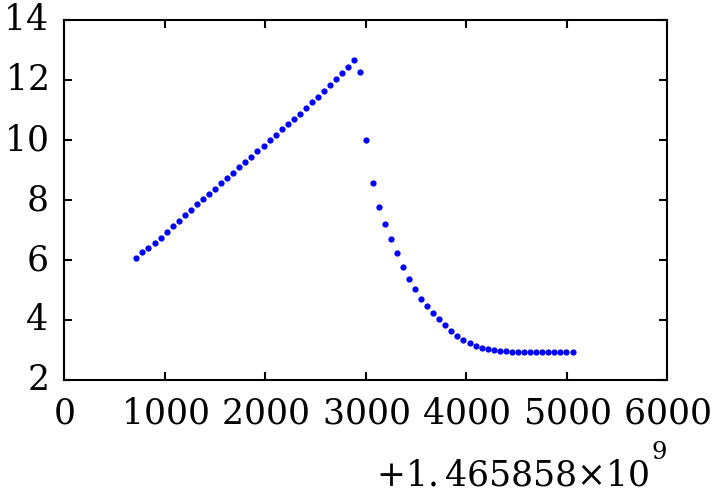

In [11]:
fig, ax = plt.subplots()

for sa in sweep.stream_arrays:
    ax.plot(sa.epoch, sa.state.temperature.primary_package, '.b')

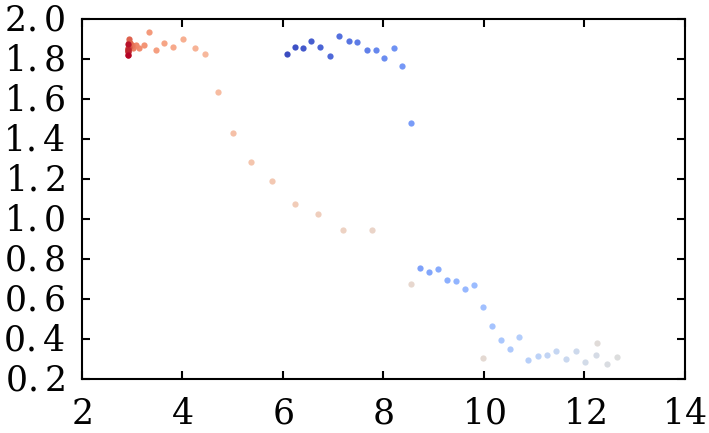

In [15]:
fig, ax = plt.subplots()

for sa in sweep.stream_arrays:
    ax.plot(sa.state.temperature.primary_package, np.abs(sa[0].s21_point), '.',
            color=epoch_mappable.to_rgba(sa.epoch))